# Linkedin Data Analysis


In [200]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
data = pd.read_csv('FinalData.csv')

# Data Cleaning

In [202]:
data.head(5)

,_id,education__major,education__end,education__name,education__degree,education__start,locality,skills,industry,interval,experience__org,experience__title,experience__end,experience__start
0,in-0526613,NaN,NaN,NaN,NaN,NaN,"Paris , France",Financial Modeling,Bank Investment,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Corporate Finance,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Valuation,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Investment Banking,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mergers,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
data = pd.DataFrame(data)

In [204]:
df = data.copy()

In [205]:
df.drop(['education__major','education__name','education__end','education__degree','education__start','interval'],axis=1)

,_id,locality,skills,industry,experience__org,experience__title,experience__end,experience__start
0,in-0526613,"Paris , France",Financial Modeling,Bank Investment,NaN,NaN,NaN,NaN
1,NaN,NaN,Corporate Finance,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Valuation,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Investment Banking,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Mergers,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,Cross-border M&A,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,M&A execution,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,LBO,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,Private Equity,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,IFRS,NaN,NaN,NaN,NaN,NaN


In [206]:
indus_loc_frame= df.filter(['_id','locality','industry'], axis=1)

In [207]:
skill_frame = df.filter(['_id','skills'],axis=1)

In [208]:
indus_loc_frame.head(10)

,_id,locality,industry
0,in-0526613,"Paris , France",Bank Investment
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [209]:
indus_loc_frame = indus_loc_frame.dropna()

In [210]:
indus_loc_frame = indus_loc_frame.reset_index()

In [211]:
indus_loc_frame = indus_loc_frame.drop(['index'],axis=1)

In [212]:
indus_loc_frame.head(10)

,_id,locality,industry
0,in-0526613,"Paris , France",Bank Investment
1,in-05574,"Sankt Gallen , Switzerland",Management
2,in-05stephaniemartinez,"Florida,US",Marketing and Advertising
3,in-06021300,"Dallas, US",Oil & Energy
4,in-062898,"Denver ,US",Human Resource
5,in-0629000jeansan,"San Francisco,California",Pharmaceuticals
6,in-07041988marcomondello,"Roma, Italia",Architecture
7,in-07061976,"London, UK",Real Estate
8,in-07082006,"Atlanta ,US",Restaurants
9,in-072154,"Los Angeles ,US",Hospitality


In [213]:
skill_frame.head(10)

,_id,skills
0,in-0526613,Financial Modeling
1,NaN,Corporate Finance
2,NaN,Valuation
3,NaN,Investment Banking
4,NaN,Mergers
5,NaN,Cross-border M&A
6,NaN,M&A execution
7,NaN,LBO
8,NaN,Private Equity
9,NaN,IFRS


In [214]:
value = skill_frame.iloc[0]['_id']
for i in skill_frame.index:
    if(pd.isna(skill_frame.iloc[i]['_id'])):
        skill_frame.iloc[i]['_id'] = value
    else:
        value = skill_frame.iloc[i]['_id']

In [215]:
skill_frame.head(10)

,_id,skills
0,in-0526613,Financial Modeling
1,in-0526613,Corporate Finance
2,in-0526613,Valuation
3,in-0526613,Investment Banking
4,in-0526613,Mergers
5,in-0526613,Cross-border M&A
6,in-0526613,M&A execution
7,in-0526613,LBO
8,in-0526613,Private Equity
9,in-0526613,IFRS


In [216]:
len(indus_loc_frame['industry'].unique().tolist())

103

In [217]:
indus_loc_frame['city'] = indus_loc_frame['locality']
indus_loc_frame['country'] = indus_loc_frame['locality']

In [218]:
for i in indus_loc_frame.index:
        item = indus_loc_frame.loc[i]['locality'].split(',')
        if(len(item)==2):
            indus_loc_frame.loc[i]['city'] = item[0]
            indus_loc_frame.loc[i]['country'] = item[1]
        else:
            indus_loc_frame.loc[i]['country'] = item[0]
        #print(item)

In [219]:
indus_loc_frame.head(10)

,_id,locality,industry,city,country
0,in-0526613,"Paris , France",Bank Investment,Paris,France
1,in-05574,"Sankt Gallen , Switzerland",Management,Sankt Gallen,Switzerland
2,in-05stephaniemartinez,"Florida,US",Marketing and Advertising,Florida,US
3,in-06021300,"Dallas, US",Oil & Energy,Dallas,US
4,in-062898,"Denver ,US",Human Resource,Denver,US
5,in-0629000jeansan,"San Francisco,California",Pharmaceuticals,San Francisco,California
6,in-07041988marcomondello,"Roma, Italia",Architecture,Roma,Italia
7,in-07061976,"London, UK",Real Estate,London,UK
8,in-07082006,"Atlanta ,US",Restaurants,Atlanta,US
9,in-072154,"Los Angeles ,US",Hospitality,Los Angeles,US


In [220]:
for i in indus_loc_frame.index:
    indus_loc_frame.iloc[i]['city'] = indus_loc_frame.iloc[i]['city'].strip()     

In [221]:
temp = indus_loc_frame.loc[indus_loc_frame['country']=='US']
temp

,_id,locality,industry,city,country
2,in-05stephaniemartinez,"Florida,US",Marketing and Advertising,Florida,US
4,in-062898,"Denver ,US",Human Resource,Denver,US
8,in-07082006,"Atlanta ,US",Restaurants,Atlanta,US
9,in-072154,"Los Angeles ,US",Hospitality,Los Angeles,US
13,in-080372,"Texas,US",Oil & Energy,Texas,US
17,in-08michaelwright,"Boston ,US",Information Technology and Services,Boston,US
22,in-09876,"Washington D.C. Metro ,US",Management,Washington D.C. Metro,US
32,in-0pubjerrychellis1028b8,"New York ,US",Capital Markets,New York,US
35,in-0x0000008e,"Texas ,US",Information Technology and Services,Texas,US
58,in-01a31,"Chicago ,US",Information Technology and Services,Chicago,US


In [222]:
temp = temp.reset_index()

In [223]:
indus_loc = {}
for i in temp.index:
    if(temp.iloc[i]['city'] not in indus_loc):
        indus_loc[temp.iloc[i]['city']] = 1
    else:
        indus_loc[temp.iloc[i]['city']] += 1

In [224]:
indus_loc

{'Florida': 1,
 'Denver': 1,
 'Atlanta': 1,
 'Los Angeles': 4,
 'Texas': 3,
 'Boston': 1,
 'Washington D.C. Metro': 1,
 'New York': 4,
 'Chicago': 2,
 'Philadelphia': 1}

In [225]:
indus_loc.values()

dict_values([1, 1, 1, 4, 3, 1, 1, 4, 2, 1])

In [226]:
indus_loc.keys()

dict_keys(['Florida', 'Denver', 'Atlanta', 'Los Angeles', 'Texas', 'Boston', 'Washington D.C. Metro', 'New York', 'Chicago', 'Philadelphia'])

# Data Visulaization

# 1. Distribution of all kind of Industries in the states of USA

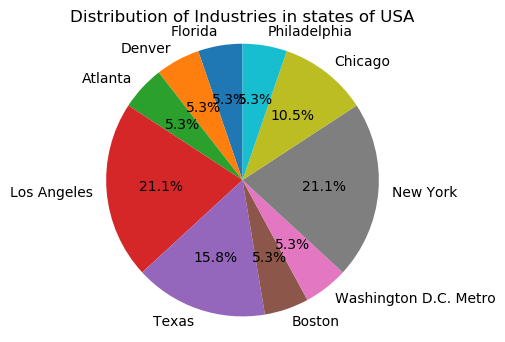

In [227]:
import matplotlib.pylab as plot
plot.rcParams['figure.dpi'] = 100
fig1, ax1 = plt.subplots()
ax1.set_title("Distribution of Industries in states of USA")
ax1.pie(indus_loc.values(), labels=indus_loc.keys(), autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  
plt.show()

In [228]:
temp = indus_loc_frame.loc[indus_loc_frame['country']=='United Kingdom']
temp

,_id,locality,industry,city,country
33,in-0robertvale0,United Kingdom,Human Resource,United Kingdom,United Kingdom
43,in-001neilpeacock,United Kingdom,Information Technology,United Kingdom,United Kingdom
156,in-1samantha,United Kingdom,Staffing and Recruiting,United Kingdom,United Kingdom
258,in-2jaipm,United Kingdom,Information Technology,United Kingdom,United Kingdom
323,in-1samantha,United Kingdom,Staffing and Recruiting,United Kingdom,United Kingdom
425,in-2jaipm,United Kingdom,Information Technology,United Kingdom,United Kingdom


In [229]:
temp = temp.reset_index()

In [230]:
industry = {}
for i in temp.index:
    if(temp.iloc[i]['industry'] not in industry):
        industry[temp.iloc[i]['industry']] = 1
    else:
        industry[temp.iloc[i]['industry']] += 1

# 2. Distribution of Industries in the states of UK

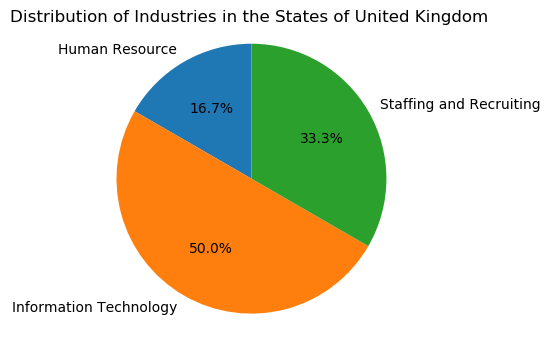

In [231]:
import matplotlib.pylab as plot
plot.rcParams['figure.dpi'] = 100
fig1, ax1 = plt.subplots()
ax1.set_title("Distribution of Industries in the States of United Kingdom")
ax1.pie(industry.values(), labels=industry.keys(), autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  
plt.show()

In [232]:
temp = indus_loc_frame.loc[indus_loc_frame['industry']=='Information Technology']

In [233]:
temp = temp.reset_index()

In [234]:
temp.head(5)

,index,_id,locality,industry,city,country
0,26,in-0gabrielebaldi,"Livorno, Italia",Information Technology,Livorno,Italia
1,28,in-0malteholm,"Copenhagen , Denmark",Information Technology,Copenhagen,Denmark
2,31,in-0paulo,"Curitiba e Região, Brasil",Information Technology,Curitiba e Região,Brasil
3,43,in-001neilpeacock,United Kingdom,Information Technology,United Kingdom,United Kingdom
4,44,in-00666,Turkey,Information Technology,Turkey,Turkey


In [235]:
city_set = {}
for i in temp.index:
    if(temp.iloc[i]['city'] not in city_set):
        city_set[temp.iloc[i]['city']] = 1
    else:
        city_set[temp.iloc[i]['city']] += 1

In [236]:
x=[]
y=[]
for i in city_set:
    if(city_set[i]>=2):
        if(i=="United Kingdom"):
            x.append("UK")
        else:
            x.append(i)
        y.append(city_set[i]*100)

# 3. Popularity of Information Technology 

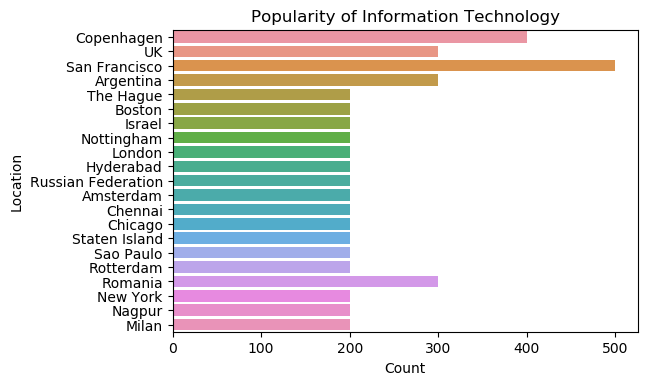

In [237]:
import matplotlib.pylab as plot
plot.rcParams['figure.dpi'] = 100
sns.barplot(y,x,data=temp)
plt.xlabel("Count")
plt.ylabel("Location")
plt.title("Popularity of Information Technology")
plt.show()

In [238]:
temp.head(10)

,index,_id,locality,industry,city,country
0,26,in-0gabrielebaldi,"Livorno, Italia",Information Technology,Livorno,Italia
1,28,in-0malteholm,"Copenhagen , Denmark",Information Technology,Copenhagen,Denmark
2,31,in-0paulo,"Curitiba e Região, Brasil",Information Technology,Curitiba e Região,Brasil
3,43,in-001neilpeacock,United Kingdom,Information Technology,United Kingdom,United Kingdom
4,44,in-00666,Turkey,Information Technology,Turkey,Turkey
5,48,in-00danielnewman00,"San Francisco ,California",Information Technology,San Francisco,California
6,68,in-020478,"Copenhagen , Denmark",Information Technology,Copenhagen,Denmark
7,74,in-03phd,"San Diego ,California",Information Technology,San Diego,California
8,78,in-041541234,"Rio de Janeiro, Brasil",Information Technology,Rio de Janeiro,Brasil
9,86,in-140610,Argentina,Information Technology,Argentina,Argentina


In [239]:
temp = temp.reset_index()

In [240]:
temp = temp.drop(['index'],axis=1)

In [241]:
skill_frame.head(10)

,_id,skills
0,in-0526613,Financial Modeling
1,in-0526613,Corporate Finance
2,in-0526613,Valuation
3,in-0526613,Investment Banking
4,in-0526613,Mergers
5,in-0526613,Cross-border M&A
6,in-0526613,M&A execution
7,in-0526613,LBO
8,in-0526613,Private Equity
9,in-0526613,IFRS


In [242]:
skill_set = {}
for i in temp.index:
    num = temp.iloc[i]['_id']
    for j in skill_frame.index:
        if(skill_frame.iloc[j]['_id'] == num):
            val = skill_frame.iloc[j]['skills']
            if(val not in skill_set):
                skill_set[val] = 1
            else:
                skill_set[val] +=1

In [243]:
skill_set

{'Engineering': 5,
 'Problem Solving': 1,
 'Java': 22,
 'Microsoft Office': 10,
 'Testing': 1,
 'Project Engineering': 1,
 'Visual Basic': 1,
 'SAP': 2,
 'AutoCAD': 1,
 nan: 484,
 'Scrum': 2,
 'Agile Methodologies': 2,
 'Web Services': 5,
 '.NET': 2,
 'C#': 1,
 'Software Development': 6,
 'XML': 5,
 'WCF': 1,
 'XSLT': 1,
 'TFS': 1,
 'Visual Studio': 1,
 'Agile Project Management': 1,
 'Microsoft SQL Server': 1,
 'LINQ': 1,
 'SOA': 5,
 'JavaScript': 13,
 'Software Design': 1,
 'Integration': 6,
 'Enterprise Architecture': 1,
 'AJAX': 5,
 'SAP R/3': 2,
 'ABAP': 1,
 'Business Objects': 1,
 'SAP BI/BW': 1,
 'Fuzzy Logic': 1,
 'Business Intelligence': 9,
 'ERP': 1,
 'DLP': 1,
 'Managed Services': 2,
 'Solution Selling': 2,
 'Network Security': 5,
 'Security': 5,
 'Virtualization': 1,
 'Project Management': 14,
 'Cross-functional Team Leadership': 1,
 'Business Process Re-engineering': 1,
 'Software Development Life Cycle': 1,
 'Business': 1,
 'Software Project Management': 1,
 'Business Ana

In [244]:
x = []
y = []
for w in sorted(skill_set, key=skill_set.get, reverse=True):
    x.append(w)
    y.append(skill_set[w])

In [245]:
x.remove(x[0])

In [246]:
y.remove(y[0])

In [247]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(0,len(y)):
    y[i]=float(y[i])
    

In [248]:
x = x[:10]
y = y[:10]

# 4. Popular Technologies in IT

Text(0.5, 1.0, 'Popular Technologies in IT')

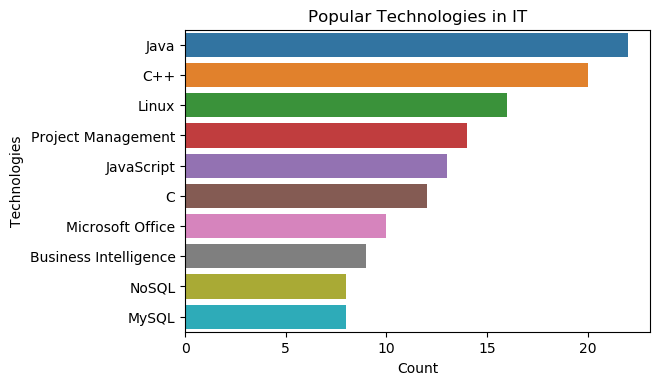

In [250]:

# plt.barh(x[:5],y[:5],color='green')
# plt.show()
import matplotlib.pylab as plot
plot.rcParams['figure.dpi'] = 100
ax = sns.barplot(y,x)
plt.xlabel("Count")
plt.ylabel("Technologies")
plt.title("Popular Technologies in IT")

C:\Users\Shweta\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Shweta\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


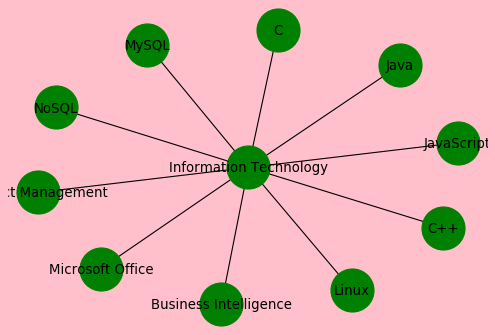

In [251]:
import networkx as nx
import matplotlib.pyplot as plt
plot.rcParams['figure.dpi'] = 80
G=nx.Graph()
root_node = "Information Technology"
G.add_node(root_node)
for i in x:
    G.add_node(i)
    G.add_edges_from([(root_node,i)])
# Custom the nodes:
fig = plt.figure()
nx.draw(G, with_labels=True, node_color='green', node_size=1500, edge_color='black')
fig.set_facecolor("pink")

In [252]:
fs1 = indus_loc_frame.loc[indus_loc_frame['industry']=='Financial Services']

In [253]:
fs2 = indus_loc_frame.loc[indus_loc_frame['industry']=='Banking']

In [254]:
fs1 = fs1.append(fs2)

In [255]:
fs1 = fs1.reset_index()
fs1 = fs1.drop(['index'],axis=1)

In [256]:
skill_set = {}
for i in fs1.index:
    num = fs1.iloc[i]['_id']
    for j in skill_frame.index:
        if(skill_frame.iloc[j]['_id'] == num):
            val = skill_frame.iloc[j]['skills']
            if(val not in skill_set):
                skill_set[val] = 1
            else:
                skill_set[val] +=1

In [257]:
x = []
y = []
for w in sorted(skill_set, key=skill_set.get, reverse=True):
    x.append(w)
    y.append(skill_set[w])

In [258]:
x.remove(x[0])
y.remove(y[0])

In [259]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(0,len(y)):
    y[i]=float(y[i])

In [260]:
x = x[:10]
y = y[:10]

# 5. Popular Technologies in Financial Sector

Text(0.5, 1.0, 'Popular Technologies in Financial Sector')

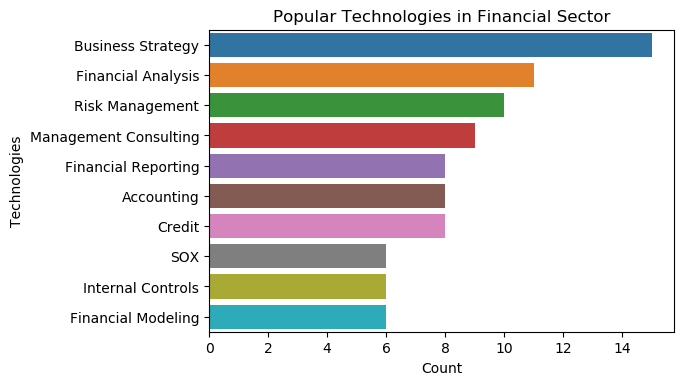

In [262]:
import matplotlib.pylab as plot
plot.rcParams['figure.dpi'] = 100
ax = sns.barplot(y,x)
plt.xlabel("Count")
plt.ylabel("Technologies")
plt.title("Popular Technologies in Financial Sector")

C:\Users\Shweta\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Shweta\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


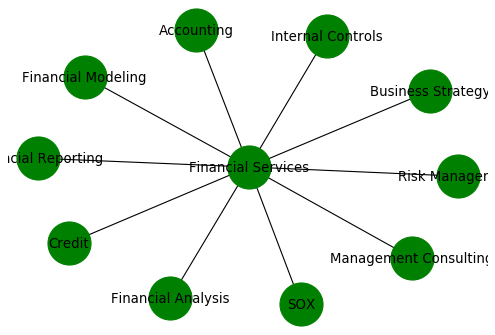

In [263]:
import networkx as nx
import matplotlib.pyplot as plt
plot.rcParams['figure.dpi'] = 80
G=nx.Graph()
root_node = "Financial Services"
G.add_node(root_node)
for i in x:
    G.add_node(i)
    G.add_edges_from([(root_node,i)])
# Custom the nodes:
fig = plt.figure()
nx.draw(G, with_labels=True, node_color='green', node_size=1500, edge_color='black')
fig.set_facecolor("white")

In [264]:
fs3 = indus_loc_frame.loc[indus_loc_frame['industry']=='Bank Investment']

In [265]:
fs4 = indus_loc_frame.loc[indus_loc_frame['industry']=='Marketing and Advertising']

In [266]:
fs3 = fs3.reset_index()
fs3 = fs3.drop(['index'],axis=1)
fs4 = fs4.reset_index()
fs4 = fs4.drop(['index'],axis=1)

In [267]:
skill_set_1 = {}
for i in fs3.index:
    num = fs3.iloc[i]['_id']
    for j in skill_frame.index:
        if(skill_frame.iloc[j]['_id'] == num):
            val = skill_frame.iloc[j]['skills']
            if(val not in skill_set_1):
                skill_set_1[val] = 1
            else:
                skill_set_1[val] +=1

In [268]:
skill_set_2 = {}
for i in fs4.index:
    num = fs4.iloc[i]['_id']
    for j in skill_frame.index:
        if(skill_frame.iloc[j]['_id'] == num):
            val = skill_frame.iloc[j]['skills']
            if(val not in skill_set_2):
                skill_set_2[val] = 1
            else:
                skill_set_2[val] +=1

In [269]:
x1 = []
y1 = []
for w in sorted(skill_set_1, key=skill_set_1.get, reverse=True):
    x1.append(w)
    y1.append(skill_set_1[w])

In [270]:
x2 = []
y2 = []
for w in sorted(skill_set_2, key=skill_set_2.get, reverse=True):
    x2.append(w)
    y2.append(skill_set_2[w])

In [271]:
x1 = x1[:5]
y1 = y1[:5]
x2 = x2[:5]
y2 = y2[:5]

In [272]:
import pprint
pprint.pprint(skill_set_1.keys())

dict_keys(['Financial Modeling', 'Corporate Finance', 'Valuation', 'Investment Banking', 'Mergers', 'Cross-border M&A', 'M&A execution', 'LBO', 'Private Equity', 'IFRS', 'US GAAP', 'Financial Audits', 'Financial Accounting', 'Financial Structuring', 'Internal Controls', 'Financial Reporting', 'Team Management', 'Capital Markets', 'Consolidation', 'Project Management', 'Financial Analysis', 'IPO', 'Auditing', 'Business Valuation', 'Contract Negotiation', 'Due Diligence'])


In [273]:
pprint.pprint(skill_set_2.keys())

dict_keys(['Collateral', 'Research', 'Email Marketing', 'Marketing Communications', 'Direct Marketing', 'Event Planning', 'Marketing', 'Social Media Marketing', 'Lead Generation', 'Social Media', 'Public Relations', 'Product Marketing', 'Marketing Management', 'Marketing Strategy', 'Vendor Management Experience', 'Franchising', 'New Business Development', 'Team Management', 'Team Building', 'Sales Management', 'Business Development', 'Start-ups', 'Business Planning', 'Digital Strategy', 'Integrated Marketing', 'Digital Marketing', 'Relationship Marketing', 'Customer Insight', 'Mobile Marketing', 'Digital Media', 'Creative Direction', 'Brand Management', 'Online Advertising', 'Multi-channel Marketing', 'Brand Architecture', 'Corporate Branding', 'E-commerce', 'Advertising', 'Media Planning', 'Media Buying', 'Brand Development', 'Event Management', 'Campaign Management', 'Media Strategy', 'Loyalty Programs', 'Online Marketing', 'Budgets', 'Integrated Marketing Communications Planning', '

# Thank You!